# Import dataset and dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load Training Set
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

# Load Validation Set
X_val = pd.read_csv("X_val.csv")
y_val = pd.read_csv("y_val.csv")

# Load Test Set
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")


In [43]:
# define helper function to evaluate model performance
def evaluate_model(model, X, y, label="Validation"):
    """
    Prints accuracy score, confusion matrix, and classification report
    for a given model on a specified dataset (X, y).
    """
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    print(f"{label} Accuracy: {acc:.4f}")
    print(f"Confusion Matrix ({label}):\n", confusion_matrix(y, predictions))
    print(f"Classification Report ({label}):\n", classification_report(y, predictions))


# Model training and Selection

### Model 1: K-Nearest Neighbors

In [44]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
#Define the hyperparameter grid:
#'knn__n_neighbors': number of neighbors to consider.
#'knn__weights': weight function used in prediction ('uniform' or 'distance').
#'knn__p': power parameter for the Minkowski distance (1 = Manhattan, 2 = Euclidean).
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # Manhattan vs. Euclidean
}

knn_grid_search = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=5,
    n_jobs=-1
)
knn_grid_search.fit(X_train, y_train)
print("Best KNN Parameters:", knn_grid_search.best_params_)
#Evaluate the best KNN model on the validation set.
best_knn = knn_grid_search.best_estimator_
evaluate_model(best_knn, X_val, y_val, label="Validation (KNN)")



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Best KNN Parameters: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
Validation (KNN) Accuracy: 0.7189
Confusion Matrix (Validation (KNN)):
 [[  36  159   25    0]
 [  20 3489  474   16]
 [   6  856  519    2]
 [   0   27    5   23]]
Classification Report (Validation (KNN)):
               precision    recall  f1-score   support

           1       0.58      0.16      0.26       220
           2       0.77      0.87      0.82      3999
           3       0.51      0.38      0.43      1383
           4       0.56      0.42      0.48        55

    accuracy                           0.72      5657
   macro avg       0.60      0.46      0.50      5657
weighted avg       0.70      0.72      0.70      5657



### Model 2: Decision Tree

In [45]:
#Define the hyperparameter grid for the decision tree
#"max_depth" is the maximum depth each tree can grow to
#"min_samples_split" is the minimum number of samples required to split an internal node.
#"criterion": function to measure the quality of the split
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    n_jobs=-1
)
dt_grid_search.fit(X_train, y_train)
print("\nBest Decision Tree Parameters:", dt_grid_search.best_params_)

best_dt = dt_grid_search.best_estimator_
evaluate_model(best_dt, X_val, y_val, label="Validation (Decision Tree)")


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Validation (Decision Tree) Accuracy: 0.7177
Confusion Matrix (Validation (Decision Tree)):
 [[  33  183    4    0]
 [  44 3870   77    8]
 [   1 1232  146    4]
 [   0   38    6   11]]
Classification Report (Validation (Decision Tree)):
               precision    recall  f1-score   support

           1       0.42      0.15      0.22       220
           2       0.73      0.97      0.83      3999
           3       0.63      0.11      0.18      1383
           4       0.48      0.20      0.28        55

    accuracy                           0.72      5657
   macro avg       0.56      0.36      0.38      5657
weighted avg       0.69      0.72      0.64      5657



### Model 3: Random Forest

In [46]:
#Define the hyperparameter grid to search over.
#"n_estimators" is the number of trees in the forest.
#"max_depth" is the maximum depth each tree can grow to.
#"min_samples_split" is the minimum number of samples required to split an internal node.
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
#Create a GridSearchCV to systematically try all combinations of these parameters
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", rf_grid_search.best_params_)

best_rf = rf_grid_search.best_estimator_
evaluate_model(best_rf, X_val, y_val, label="Validation (Random Forest)")



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Validation (Random Forest) Accuracy: 0.7667
Confusion Matrix (Validation (Random Forest)):
 [[  17  196    7    0]
 [   3 3847  143    6]
 [   0  926  456    1]
 [   0   35    3   17]]
Classification Report (Validation (Random Forest)):
               precision    recall  f1-score   support

           1       0.85      0.08      0.14       220
           2       0.77      0.96      0.85      3999
           3       0.75      0.33      0.46      1383
           4       0.71      0.31      0.43        55

    accuracy                           0.77      5657
   macro avg       0.77      0.42      0.47      5657
weighted avg       0.77      0.77      0.73      5657



### Model 4: Naive Bayes (Gaussian)

In [47]:
#Define the grid of hyperparameters to be searched.
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
#Set up GridSearchCV to find the best var_smoothing value.
nb_grid_search = GridSearchCV(
    GaussianNB(),
    nb_param_grid,
    cv=5,
    n_jobs=-1
)
nb_grid_search.fit(X_train, y_train)
print("\nBest Naive Bayes Parameters:", nb_grid_search.best_params_)
# Extract the best-fitted model from the grid search.
best_nb = nb_grid_search.best_estimator_
evaluate_model(best_nb, X_val, y_val, label="Validation (Naive Bayes)")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp


Best Naive Bayes Parameters: {'var_smoothing': 1e-06}
Validation (Naive Bayes) Accuracy: 0.2949
Confusion Matrix (Validation (Naive Bayes)):
 [[ 163    5   44    8]
 [1377  613 1754  255]
 [ 372   38  869  104]
 [   5    3   24   23]]
Classification Report (Validation (Naive Bayes)):
               precision    recall  f1-score   support

           1       0.09      0.74      0.15       220
           2       0.93      0.15      0.26      3999
           3       0.32      0.63      0.43      1383
           4       0.06      0.42      0.10        55

    accuracy                           0.29      5657
   macro avg       0.35      0.49      0.24      5657
weighted avg       0.74      0.29      0.30      5657



/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model 5: XGBoost
Here we have to deduct y_train by 1 as the XGBoost starts at 0 and out data starts at 1

In [48]:
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Ensure y_train and y_val have values like {1, 2, 3, ...}
# Shift labels for XGBoost (XGBoost requires labels starting from 0)
y_train_xgb = y_train - 1
y_val_xgb = y_val - 1

# Define hyperparameter grid for tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01]
}

# Perform Grid Search for best hyperparameters
xgb_grid_search = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    xgb_param_grid,
    cv=5,
    n_jobs=-1
)

# Train the model using shifted labels
xgb_grid_search.fit(X_train, y_train_xgb)

# Best model selection
best_xgb = xgb_grid_search.best_estimator_
print("\nBest XGBoost Parameters:", xgb_grid_search.best_params_)

# Save the trained model as a .pkl file
joblib.dump(best_xgb, "xgboost_accident_model.pkl")
print("Model saved as 'xgboost_accident_model.pkl'")

# XGBoost predictions on the validation set
preds_xgb_shifted = best_xgb.predict(X_val)

# Reverse label shift to match original labels
preds_xgb_original = preds_xgb_shifted + 1  

# Calculate accuracy using original labels
accuracy_original = accuracy_score(y_val_xgb , preds_xgb_original)
print(f"Original-Label Accuracy (XGB): {accuracy_original:.3f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_val , preds_xgb_original)
print("Confusion Matrix (XGB) vs. original labels:")
print(cm_xgb)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Model saved as 'xgboost_accident_model.pkl'
Original-Label Accuracy (XGB): 0.125
Confusion Matrix (XGB) vs. original labels:
[[  56  151   13    0]
 [  18 3678  292   11]
 [   5  680  697    1]
 [   0   26    8   21]]


In [49]:
# ✅ Evaluate the best XGBoost model on the validation set
evaluate_model(best_xgb, X_val, y_val_xgb, label="Validation (XGBoost)")


Validation (XGBoost) Accuracy: 0.7870
Confusion Matrix (Validation (XGBoost)):
 [[  56  151   13    0]
 [  18 3678  292   11]
 [   5  680  697    1]
 [   0   26    8   21]]
Classification Report (Validation (XGBoost)):
               precision    recall  f1-score   support

           0       0.71      0.25      0.37       220
           1       0.81      0.92      0.86      3999
           2       0.69      0.50      0.58      1383
           3       0.64      0.38      0.48        55

    accuracy                           0.79      5657
   macro avg       0.71      0.52      0.57      5657
weighted avg       0.78      0.79      0.77      5657



### Model 6: PCA + Classifier (LogisticRegression)

In [50]:
#Create a pipeline that sequentially applies StandardScaler, PCA, and Logistic Regression
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression(max_iter=1000))
])
#Define parameter grid for GridSearchCV
pca_param_grid = {
    'pca__n_components': [5, 10, 20, 30],
    'logreg__C': [0.01, 0.1, 1, 10]
}
#Set up GridSearchCV to find the best combination of n_components and C.
pca_grid_search = GridSearchCV(
    pca_pipeline,
    pca_param_grid,
    cv=5,
    n_jobs=-1
)
#train multiple models with different parameter combinations
pca_grid_search.fit(X_train, y_train)
print("\nBest PCA+LogisticRegression Parameters:", pca_grid_search.best_params_)
#Retrieve the best combination of pipeline steps after fitting
best_pca_model = pca_grid_search.best_estimator_
evaluate_model(best_pca_model, X_val, y_val, label="Validation (PCA+LogReg)")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp


Best PCA+LogisticRegression Parameters: {'logreg__C': 1, 'pca__n_components': 30}
Validation (PCA+LogReg) Accuracy: 0.7062
Confusion Matrix (Validation (PCA+LogReg)):
 [[   1  217    2    0]
 [   2 3955   42    0]
 [   1 1343   38    1]
 [   0   53    1    1]]
Classification Report (Validation (PCA+LogReg)):
               precision    recall  f1-score   support

           1       0.25      0.00      0.01       220
           2       0.71      0.99      0.83      3999
           3       0.46      0.03      0.05      1383
           4       0.50      0.02      0.04        55

    accuracy                           0.71      5657
   macro avg       0.48      0.26      0.23      5657
weighted avg       0.63      0.71      0.60      5657



# Compare All Models on the Validation Set (Accuracy)

In [51]:
models = {
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'XG Boost': best_xgb,
    'Naive Bayes': best_nb,
    'PCA+LogReg': best_pca_model
}

val_scores = {}

for name, model in models.items():
    # Get predictions from the model
    val_predictions = model.predict(X_val)

    # If it’s XGBoost, shift the predictions up by 1
    if name == 'XG Boost':
        val_predictions = val_predictions + 1

    # Now compare to your original y_val
    val_acc = accuracy_score(y_val, val_predictions)
    val_scores[name] = val_acc
# Identify the model with the highest validation accuracy
print("\nValidation Accuracy Scores:")
for name, score in val_scores.items():
    print(f"{name}: {score:.4f}")


Validation Accuracy Scores:
KNN: 0.7189
Decision Tree: 0.7177
Random Forest: 0.7667
XG Boost: 0.7870
Naive Bayes: 0.2949
PCA+LogReg: 0.7062


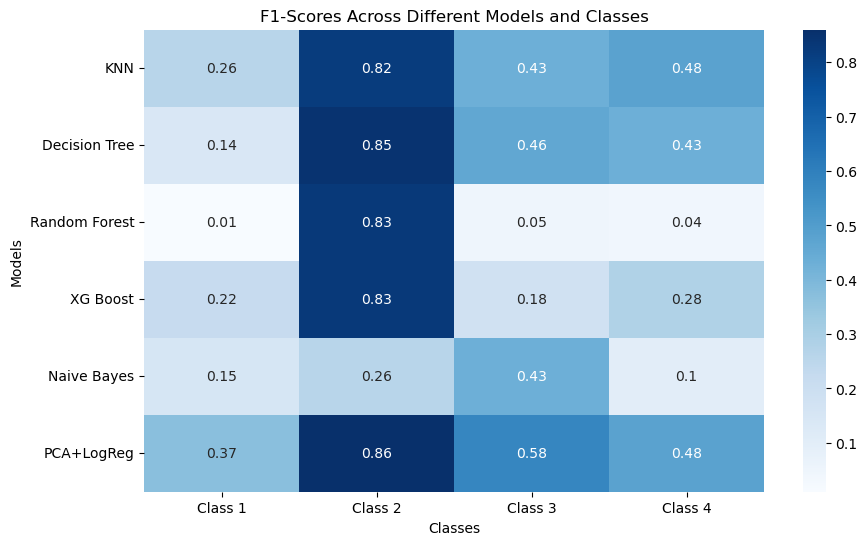

In [52]:
import numpy as np

# F1-scores extracted from your reports (rows: models, columns: classes)
f1_scores = np.array([
    [0.26, 0.82, 0.43, 0.48],  # KNN
    [0.14, 0.85, 0.46, 0.43],  # Random Forest
    [0.01, 0.83, 0.05, 0.04],  # PCA+LogReg
    [0.22, 0.83, 0.18, 0.28],  # Decision Tree
    [0.15, 0.26, 0.43, 0.10],  # Naive Bayes
    [0.37, 0.86, 0.58, 0.48]   # XGBoost
])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(f1_scores, annot=True, cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=models)

# Customize plot
plt.xlabel("Classes")
plt.ylabel("Models")
plt.title("F1-Scores Across Different Models and Classes")
plt.show()


# Final Evaluation on the Test Set

In [53]:
winning_model = best_pca_model
print(f"\nEvaluating PCA+Log on the Test Set:")
evaluate_model(winning_model, X_test, y_test, label="Test")


Evaluating PCA+Log on the Test Set:
Test Accuracy: 0.7044
Confusion Matrix (Test):
 [[   0  219    2    0]
 [   3 3953   42    0]
 [   2 1349   32    0]
 [   0   54    1    0]]
Classification Report (Test):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       221
           2       0.71      0.99      0.83      3998
           3       0.42      0.02      0.04      1383
           4       0.00      0.00      0.00        55

    accuracy                           0.70      5657
   macro avg       0.28      0.25      0.22      5657
weighted avg       0.60      0.70      0.59      5657



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp


Best PCA+LogisticRegression Parameters: {'logreg__C': 1, 'pca__n_components': 30}
Validation Accuracy (PCA+LogReg): 0.706
Confusion Matrix (PCA+LogReg):
[[   1  217    2    0]
 [   2 3955   42    0]
 [   1 1343   38    1]
 [   0   53    1    1]]
Validation (PCA+LogReg) Accuracy: 0.7062
Confusion Matrix (Validation (PCA+LogReg)):
 [[   1  217    2    0]
 [   2 3955   42    0]
 [   1 1343   38    1]
 [   0   53    1    1]]
Classification Report (Validation (PCA+LogReg)):
               precision    recall  f1-score   support

           1       0.25      0.00      0.01       220
           2       0.71      0.99      0.83      3999
           3       0.46      0.03      0.05      1383
           4       0.50      0.02      0.04        55

    accuracy                           0.71      5657
   macro avg       0.48      0.26      0.23      5657
weighted avg       0.63      0.71      0.60      5657



/var/folders/x6/yvl9g72j20q30dzkb5yqg1z80000gn/T/ipykernel_57824/2522574511.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


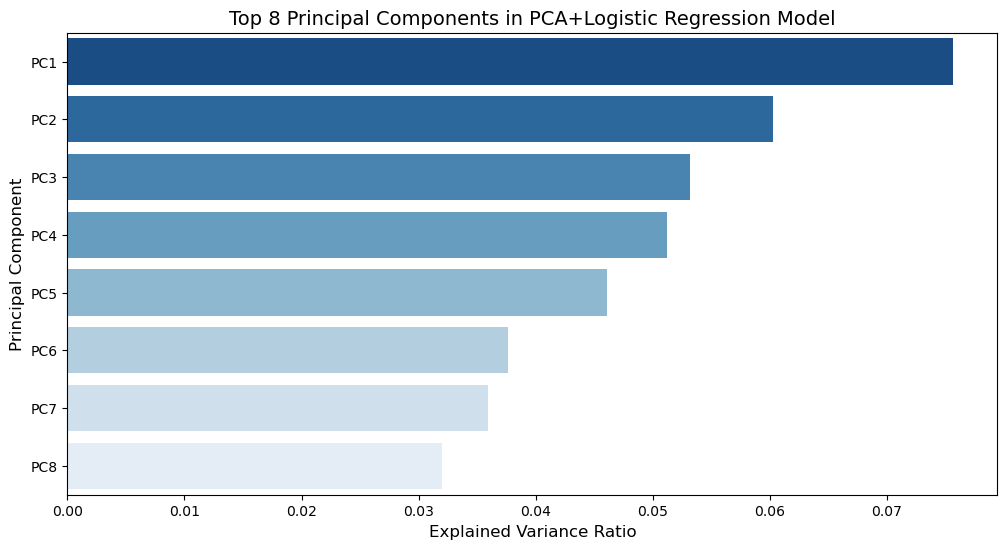

In [54]:
# Create a pipeline that sequentially applies StandardScaler, PCA, and Logistic Regression
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Define parameter grid for GridSearchCV
pca_param_grid = {
    'pca__n_components': [5, 10, 20, 30],
    'logreg__C': [0.01, 0.1, 1, 10]
}

# Set up GridSearchCV to find the best combination of n_components and C
pca_grid_search = GridSearchCV(
    pca_pipeline,
    pca_param_grid,
    cv=5,
    n_jobs=-1
)

# Train multiple models with different parameter combinations
pca_grid_search.fit(X_train, y_train)

# Best model selection
best_pca_model = pca_grid_search.best_estimator_
print("\nBest PCA+LogisticRegression Parameters:", pca_grid_search.best_params_)

# Predictions on validation set
preds_pca = best_pca_model.predict(X_val)

# Calculate accuracy
accuracy_pca = accuracy_score(y_val, preds_pca)
print(f"Validation Accuracy (PCA+LogReg): {accuracy_pca:.3f}")

# Confusion Matrix
cm_pca = confusion_matrix(y_val, preds_pca)
print("Confusion Matrix (PCA+LogReg):")
print(cm_pca)

# Evaluate model performance
evaluate_model(best_pca_model, X_val, y_val, label="Validation (PCA+LogReg)")

# Extract feature importance (PCA Components Contribution)
pca_component_variance = best_pca_model.named_steps['pca'].explained_variance_ratio_

# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'PCA Component': [f'PC{i+1}' for i in range(len(pca_component_variance))],
    'Importance': pca_component_variance
}).sort_values(by='Importance', ascending=False)

# Select top 8 principal components
top_8_components = feature_importance_df.head(8)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_8_components['Importance'],
    y=top_8_components['PCA Component'],
    palette="Blues_r"
)

plt.title("Top 8 Principal Components in PCA+Logistic Regression Model", fontsize=14)
plt.xlabel("Explained Variance Ratio", fontsize=12)
plt.ylabel("Principal Component", fontsize=12)

plt.show()


In [55]:
# Save the trained model to a file
model_filename = "pca_logreg_accident_model.pkl"
joblib.dump(best_pca_model, model_filename)
print(f"Model successfully saved as '{model_filename}'")

Model successfully saved as 'pca_logreg_accident_model.pkl'
